<a href="https://colab.research.google.com/github/om1583/ML_project/blob/main/house_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded= files.upload()


Saving Housing.csv to Housing.csv


In [2]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['Housing.csv']))
print(df)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

In [3]:

# DATA PREPROCESSING
# Converting string values to numeric values

df['mainroad'] =df['mainroad'].astype('category').cat.codes
df['basement'] =df['basement'].astype('category').cat.codes
df['guestroom'] =df['guestroom'].astype('category').cat.codes
df['hotwaterheating'] =df['hotwaterheating'].astype('category').cat.codes
df['airconditioning'] =df['guestroom'].astype('category').cat.codes
df['prefarea'] =df['prefarea'].astype('category').cat.codes
df['furnishingstatus'] =df['furnishingstatus'].astype('category').cat.codes

print(df)

        price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0           0                0           

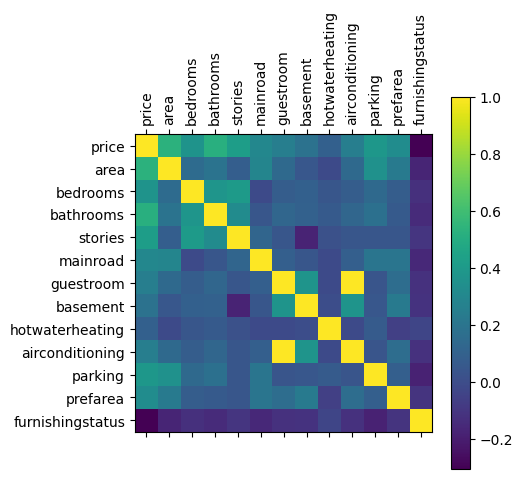

In [4]:
import matplotlib.pyplot as plt
import numpy as np
# plt.scatter(area, prices,
#             marker= ".", s=30)

#plotting correlation metric

plt.matshow(df.corr())
plt.xticks(np.arange(13), df.columns, rotation=90)
plt.yticks(np.arange(13), df.columns, rotation=0)
plt.colorbar()
plt.show()

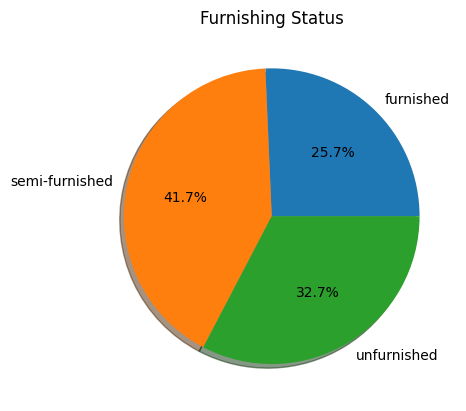

In [5]:
#plotting pie chart for furnishing status
furnish= df['furnishingstatus'].value_counts()[0]
semifurnish= df['furnishingstatus'].value_counts()[1]
unfurnish= df['furnishingstatus'].value_counts()[2]
status=[furnish,semifurnish,unfurnish]
plt.pie(status,labels=["furnished","semi-furnished","unfurnished"],shadow=True,autopct='%1.1f%%')
plt.title("Furnishing Status")
plt.show()

Score:  0.5915418272674733
Weights:  [ 2.61379428e+02  1.02017649e+05  1.20243807e+06  4.77862458e+05
  4.50627202e+05  2.02240877e+05  4.72550015e+05  6.19111736e+05
  2.02240877e+05  3.21572233e+05  5.31212492e+05 -3.19785727e+05]


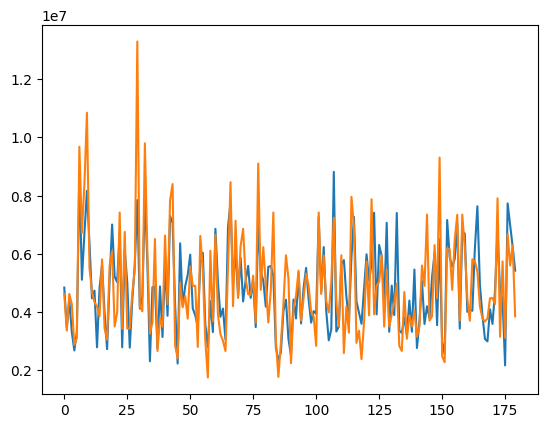

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = np.asarray(df[['area', 'bedrooms', 'bathrooms', 'stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus']])
Y = np.asarray(df['price'])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)

lineReg = LinearRegression()
lineReg.fit(X_train, y_train)
print('Score: ', lineReg.score(X_test, y_test))
print('Weights: ', lineReg.coef_)

plt.plot(lineReg.predict(X_test))
plt.plot(y_test)
plt.show()


In [7]:
import sklearn.metrics as sm
y_test_pred = lineReg.predict(X_test)
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2))
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 855945.13
Mean squared error = 1316357326171.06
Median absolute error = 636390.14
Explain variance score = 0.59
R2 score = 0.59


In [ ]:
lineReg.predict([[16200,  5,  4,  4, 1, 1, 1, 1, 1, 3, 1, 0]])

array([14803436.85760426])